In [39]:
# 2장 퍼셉트론이란?
import numpy as np

# 2장 퍼셉트론이란?

- 인간의 뇌세포 하나를 컴퓨터로 흉내낸 것
- 1957년 프랑크 로젠블라트가 퍼셉트론을 고안함
- 사람의 뇌의 동작을 전기 수위치 온/오프로 흉내낼 수 있다는 이론을 증명


* 퍼셉트론의 중요 3가지  
    1. 자극(stimulus)
    2. 반응(response)
    3. 역치(threshold)  


" 특정 자극이 있다면 그 자극이 어느 역치 이상이어야 세포가 반응한다"  



예: 짜게 먹는 사람은 자기가 평소에 먹는 만큼 음식이 짜지 않으면 싱겁다고 느낀다. ( 역치 이하의 자극은 무시 ) 

## 퍼셉트론의 동작 원리
<div>
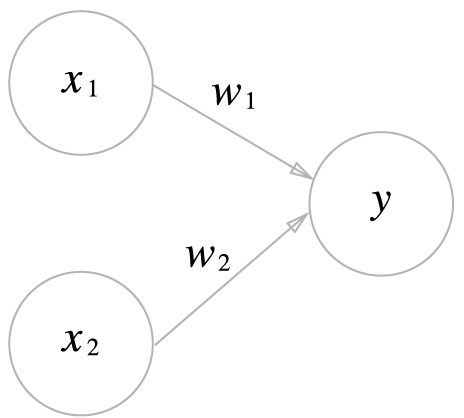
</div>

위의 그림은 입력으로 2개의 신호를 받은 퍼센트론의 예입니다.   
x_1 은 x_2는 입력신호, y는 출력신호 , w_1과 w_2 는 가중치를 뜻합니다.

그림의 원은 뉴런 혹은 노드라고 부릅니다.   
입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해집니다. w_1 과 x_1 , w_2 와 x_2   
뉴련에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력합니다. ( 이를 '뉴런이 활성화한다'로 표현 )  
그 한계값을 임계값이라 하며 θ 기호(theta) 로 나타냅니다. 
식을 아래와 같이 나타 낼수 있습니다. 


<div>
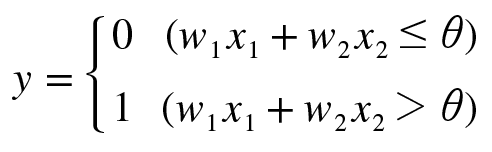
</div>

# ■ 단순한 논리회로 (p49)


>1. AND 게이트
2. OR 게이트
3. NAND 게이트
4. XOR 게이트

 ▦ AND,NAND,OR 게이트 + 진리표


## AND 게이트


## 문제17. 위의 AND 게이트를 위한 데이터 행렬을 numpy array 로 구현 하시오 

In [40]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]) # 입력 데이터
y = np.array( [[0],[0],[0],[1]]) # 정답

print(X.shape)
print(y.shape)

(4, 2)
(4, 1)


## 문제18. AND 게이트 퍼셉트론 함수를 생성하시오 !<div>
<img src="Img/aa.png" width="300"/>
</div>


In [3]:
def AND(x1,x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2 # 입력값과 가중치의 곱의 총합
    if tmp <= theta: # 입력값과 가중치의 총합이 임계치를 넘지 않는다면
        return 0
    elif tmp > theta:
        return 1
    

print( AND(0,0))
print( AND(1,0))
print( AND(0,1))
print( AND(1,1))

0
0
0
1


## 문제19. OR 게이트 퍼셉트론 함수를 생성하시오 !

<div>
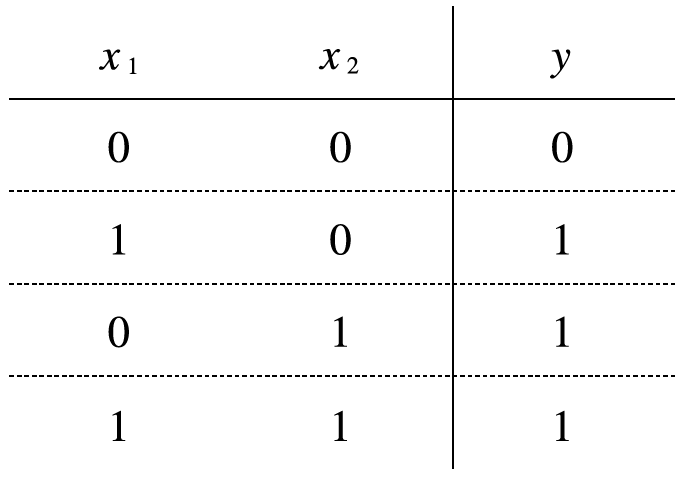
</div>

In [2]:
def OR(x1,x2):
    w1, w2, theta = 0.5, 0.5, 0.3
    tmp = x1*w1 + x2*w2 # 입력값과 가중치의 곱의 총합
    if tmp <= theta: # 입력값과 가중치의 총합이 임계치를 넘지 않는다면
        return 0
    elif tmp > theta:
        return 1
    
print( OR(0,0))
print( OR(1,0))
print( OR(0,1))
print( OR(1,1))

0
1
1
1


## 문제20. 아까 만들었던 AND 게이트의 데이터 행렬에서 X 행렬에 1행 1열에 데이터를 가져오시오 ~

In [43]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]) # 입력 데이터
y = np.array( [[0],[0],[0],[1]]) # 정답

In [44]:
X[0][0]

0

## 문제21. 위에서 만든 퍼셉트론 함수 AND 를 가지고 입력값 X 에 데이터를 입력받아 아래와 같이 결과를 출력하시오 !

In [45]:
for i in  range(X.shape[0]):
    print(AND(X[i][0],X[i][1]))

0
0
0
1


## 문제22. 아래의 표와 같은 NAND 게이트 함수를 생성하고 구현하시오 ! 

<div>
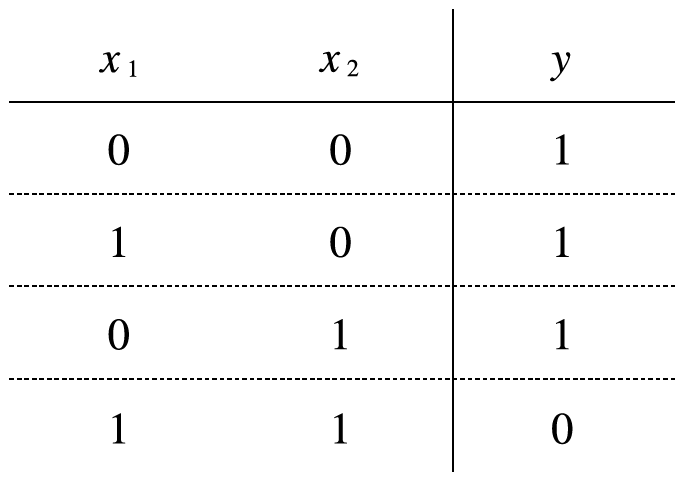
</div>


In [9]:
def NAND(x1,x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = x1*w1 + x2*w2 # 입력값과 가중치의 곱의 총합
    if tmp <= theta: # 입력값과 가중치의 총합이 임계치를 넘지 않는다면
        return 0
    elif tmp > theta:
        return 1
    
print( NAND(0,0))
print( NAND(1,0))
print( NAND(0,1))
print( NAND(1,1))

1
1
1
0


# ■ 가중치와 편향 구현하기  p52

1. 파라미터? 가중치, 편향 
2. 하이퍼 파라미터? 러닝레이트, 가중치 감소(dacay), 층수와 뉴런의 갯수

가중치 ? 입력신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수 입니다.  
편향 ? 입력신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수 입니다. 

<div>
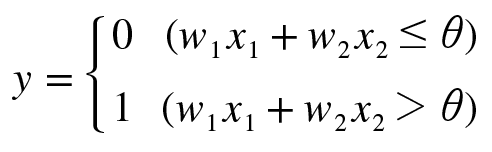
</div>

위 의 식에서 θ 를 -b 로 치환하면 퍼셉트론의 동작이 아래의 식처럼 됩니다.    
위의 식과 아래의 식은 기호 표기만 바꿧을 뿐, 그 의미는 같습니다.   

b는 여기서 편향(bias) 이라 합니다. 

<div>
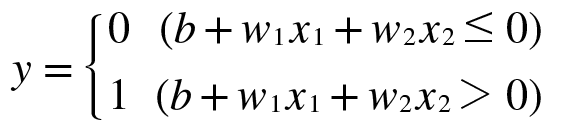
</div>

# ▦ XOR 게이트

 eXclusive  OR  게이트

exclusive ? 베타적 (자기외에는 거부한다는 뜻 )

- 1957 년 로젠블레트 퍼셉트론
- 1959년 민스키님이 퍼셉트론의 문제점을 지적을 했는데 xor 게이트는 분류를 못한다는 문제점을 지적을 했다. 

AND, OR, NAND 는 단층 신경망으로 구현이 되는데 XOR 게이터는 단층으로는 구현이 안됩니다. 

- 20년 후에 다층 퍼셉트론으로 비선형 영역을 분려했음


XOR 게이트 
<div>
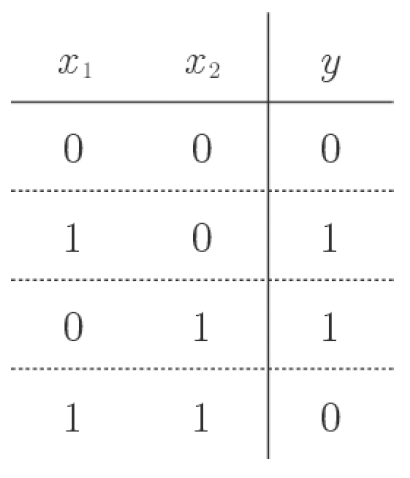
</div>
는 퍼셉트론으로는 나타 낼수 없습니다. 


<div>
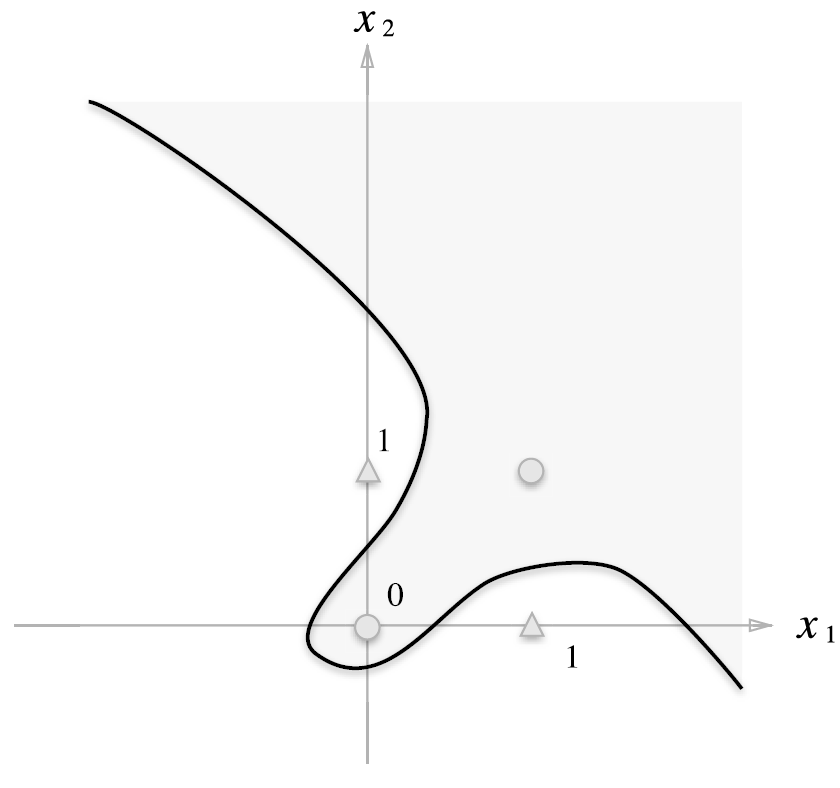
</div>

<div>
    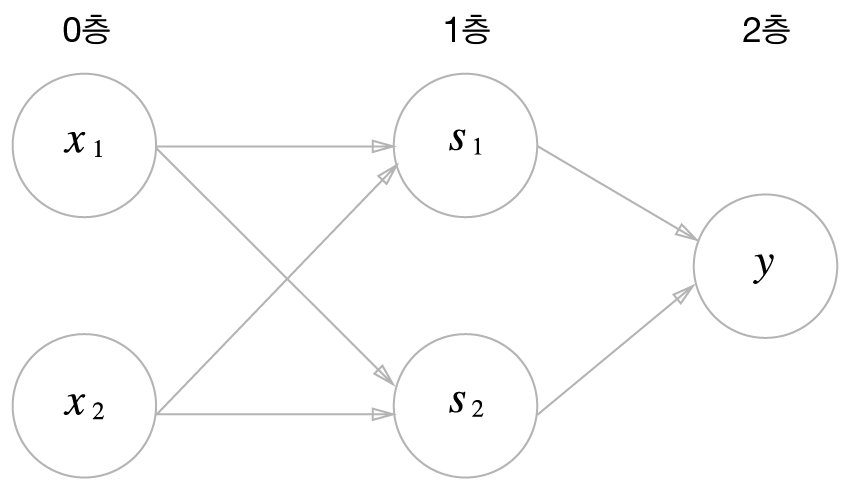
</div>


<div>
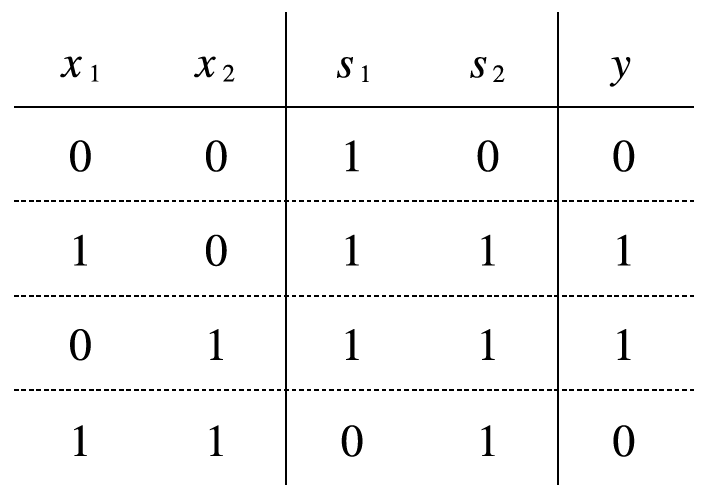
</div>

<div>
<img src="Img/fig 2-9.png"fig 2-g" width="200"/>
</div>



<div>
<img src="Img/fig 2-11.png"fig 2-g" width="200"/>
</div>


책 58 페이지의 그림 2-12 를 보면 다층 퍼셉트론으로 XOR 게이트를 해결한게 나옵니다. 

## 문제23. 그림 2-11에 나오는 그림으로 입력값 데이터를 받아서 XOR  게이트 결과가 출력되게 하시오 !

In [47]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

print( XOR(0,0))
print( XOR(1,0))
print( XOR(0,1))
print( XOR(1,1))


0
1
1
0


예 : or 게이트 처럼 입력신호가 x1과 x2 값을 받는 경우에 편향(x0) 이 없다면 target 을 분류하는 직선은 무조건 원점을 통과해야만 하기 때문에 제대로 분류할 수 없게 됩니다. 

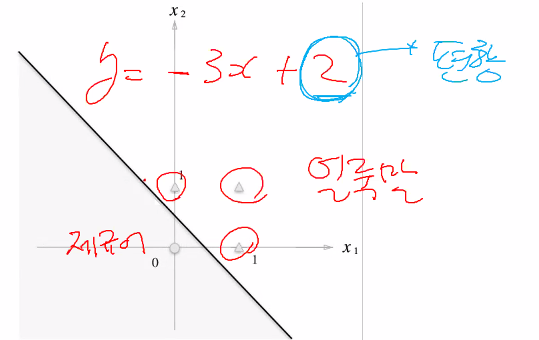

## 문제24. 그럼 이번에는 편향을 넣어서 AND 게이트 함수를 생성하시오 !


In [48]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5]) # 실제로는 이 w 와 b 를 컴퓨터(기계) 가 학습합니다. 
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else :
        return 1    

In [49]:
print( AND(0,0))
print( AND(1,0))
print( AND(0,1))
print( AND(1,1))

0
0
0
1


## 문제2.5 OR 게이트 함수를 생성하시오 !

In [50]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.4
    tmp = np.sum(x*w)+b
    if tmp <= 0:
        return 0
    else:
        return 1
print (OR(0,0) )
print (OR(1,0) )
print (OR(0,1) )
print (OR(1,1) )

0
1
1
1


## 문제26. (오늘의 마지막 문제)

NAND 게이트 함수를 만들고 XOR 게이트 함수를 만들어서 아래의 결과가 출력되게 하시오. 

In [51]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

print( XOR(0,0))
print( XOR(1,0))
print( XOR(0,1))
print( XOR(1,1))


0
1
1
0


In [53]:
for i in  range(X.shape[0]):
    print(XOR(X[i][0],X[i][1]))

0
1
1
0


In [62]:
for i in X:
    print(XOR(i[0],i[1]))

0
1
1
0


# 원숭이도 푸는 문제를 선형 분류기로는 못 푼다.

그래서 XOR 게이트로 푼다. 

실질적인 의미를 보자



<div>
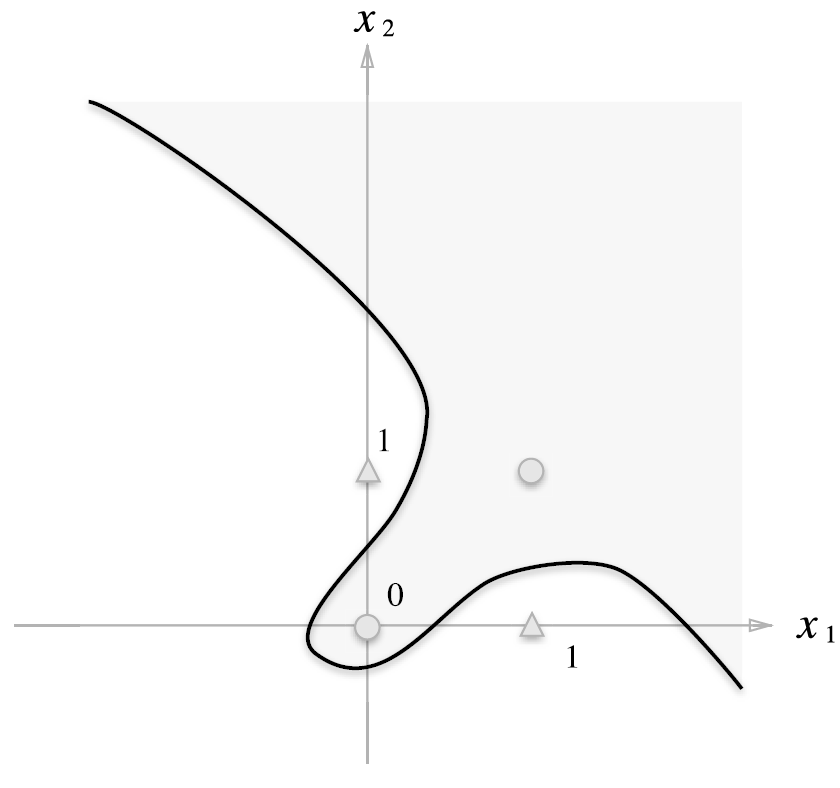
</div>

<div>
    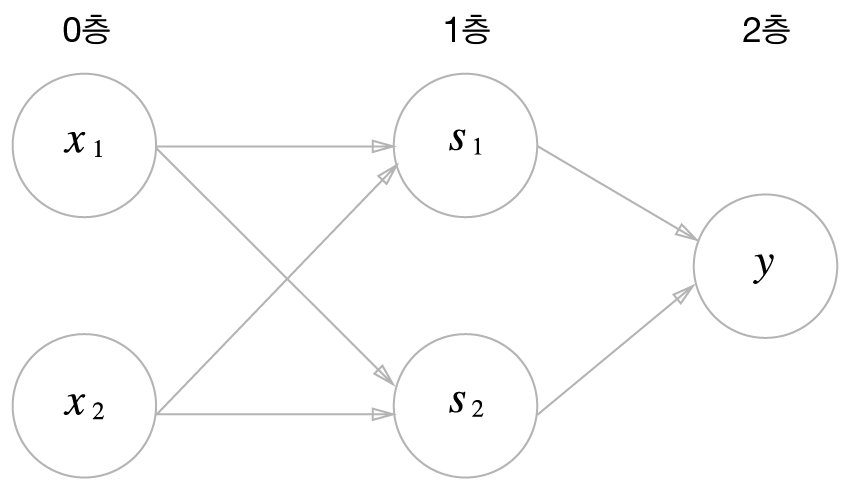
</div>

그렇다면 다층 퍼셉트론은 어떤식으로 작용 하길래? 위와 같이 그림을 그릴수 있는것인가?


<div>
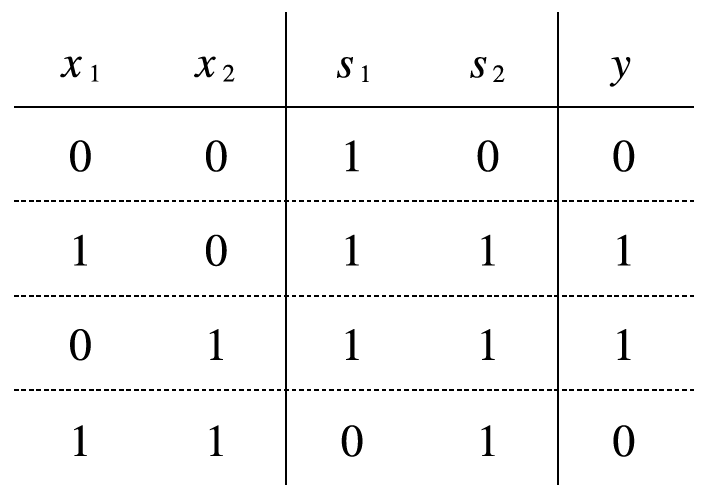
</div>

<div>
<img src="Img/fig 2-9.png"fig 2-g" width="200"/>
</div>


<div>
<img src="Img/fig 2-11.png"fig 2-g" width="200"/>
</div>
                      
                                               
                                             